# Introduction to financial derivatives
## Types of financial markets and traded assets and derivatives


---
 
 
- Copyright (c) Lukas Gonon, 2024. All rights reserved

- Author: Lukas Gonon <l.gonon@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

Disclaimer: All data used in this course are publicly available

In [1]:
import yahoo_fin.stock_info as yf  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import random
import sklearn
from sklearn.linear_model import LinearRegression

# 1. Working with financial data: stocks



In [2]:
prices = pd.read_csv('sp500stocks.csv',index_col=0)
prices.info()
prices.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3270 entries, 2011-01-03 to 2023-12-29
Columns: 443 entries, MMM to TFX
dtypes: float64(443)
memory usage: 11.1+ MB


,MMM,ABT,ACN,AYI,ADBE,AMD,AAP,AES,AMG,AFL,...,LDOS,MOH,COR,GEN,BLDR,GL,ELV,BR,TSLA,TFX
2011-01-03,86.790001,22.944036,48.590000,59.360001,31.290001,8.47,65.500000,12.54,100.680000,28.770000,...,39.604939,18.719999,34.320000,17.160000,2.03,26.968889,57.950001,22.280001,1.774667,54.090000
2011-01-04,86.669998,23.159946,48.270000,58.619999,31.510000,8.77,62.240002,12.60,99.019997,28.245001,...,39.407406,18.360001,33.939999,17.160000,1.98,27.160000,58.330002,22.080000,1.778000,53.880001
2011-01-05,86.669998,23.159946,48.279999,58.400002,32.220001,8.91,62.320000,12.77,99.250000,28.190001,...,39.654320,18.160000,34.459999,17.620001,1.98,27.471111,58.480000,22.110001,1.788667,54.189999
2011-01-06,86.139999,23.111965,48.459999,60.029999,32.270000,8.69,60.270000,12.99,100.000000,28.035000,...,39.654320,18.333332,34.860001,17.690001,1.96,27.324444,59.520000,22.350000,1.858667,54.369999
2011-01-07,86.230003,23.207926,48.540001,59.770000,32.040001,8.83,61.880001,12.99,99.589996,27.924999,...,39.654320,18.533333,34.930000,17.549999,1.96,27.271111,60.459999,22.230000,1.882667,54.139999


In [3]:
load_data = False
if not load_data:
    start_date = "01/01/2011"
    end_date = "12/31/2023"
    ticker = 'SPY'
    df = yf.get_data(ticker,start_date, end_date)
    #df.head()
    df = df.drop(columns=['open', 'high', 'low', 'adjclose', 'volume','ticker'])
    df.columns=[ticker]
    df.head()
    df.to_csv('spy.csv')
else:
    df = pd.read_csv('spy.csv',index_col=0)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3270 entries, 2011-01-03 to 2023-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     3270 non-null   float64
dtypes: float64(1)
memory usage: 51.1 KB


,SPY
2011-01-03,127.050003
2011-01-04,126.980003
2011-01-05,127.639999
2011-01-06,127.389999
2011-01-07,127.139999


In [5]:
tickers = list(prices.columns)
print(tickers)

['MMM', 'ABT', 'ACN', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AMGN', 'APH', 'ANSS', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BAC', 'BK', 'BAX', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CNP', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CTAS', 'CSCO', 'C', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DLTR', 'D', 'DOV', 'DTE', 'DXC', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FCX', 'GPS', '

In [6]:
nbTickers = len(tickers)
nbExtract = 5 ## Number of tickers to consider
listExtractTickers = [ticker]
listTemp = random.sample(tickers, nbExtract)
for i in range(nbExtract):
    listExtractTickers.append(listTemp[i]) ## select nbExtract out of the whole list
print("List of extracted tickers: ", listExtractTickers)

List of extracted tickers:  ['SPY', 'MCD', 'IT', 'DVN', 'ETN', 'NWL']


In [7]:
## We construct a DataFrame with these tickers only
for ticker in listExtractTickers[1:]:
    df0 = yf.get_data(ticker, start_date, end_date)
    df0 = df0.drop(columns=['open', 'high', 'low', 'adjclose', 'volume','ticker'])
    df0.columns=[ticker]
    df = pd.concat([df, df0], axis=1)

In [8]:
print("Total number of tickers:", nbTickers)
print("Numer of rows:", len(df))
print("Number of tickers selected:", nbExtract)

Total number of tickers: 443
Numer of rows: 3270
Number of tickers selected: 5


In [9]:
df.head()

,SPY,MCD,IT,DVN,ETN,NWL
2011-01-03,127.050003,76.599998,33.529999,78.680000,51.834999,18.260000
2011-01-04,126.980003,74.309998,33.340000,78.199997,51.610001,18.100000
2011-01-05,127.639999,74.660004,33.810001,78.699997,51.974998,18.260000
2011-01-06,127.389999,74.209999,33.910000,78.230003,51.294998,18.299999
2011-01-07,127.139999,74.370003,34.009998,78.459999,51.299999,18.070000


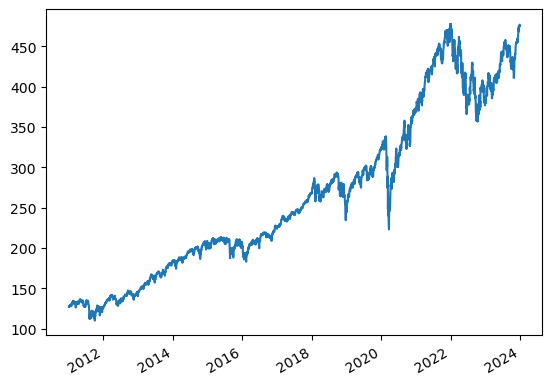

In [10]:
df["SPY"].plot();
#plt.savefig("spxplot.png")

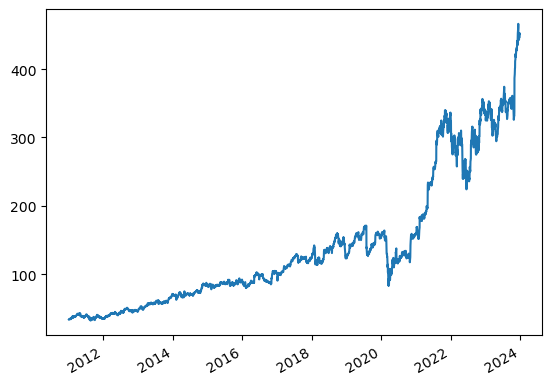

In [13]:
df["IT"].plot();

In [14]:
df.describe()

,SPY,MCD,IT,DVN,ETN,NWL
count,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000
mean,263.970609,159.333336,139.489333,46.753089,90.718754,26.170810
std,103.129588,66.106569,97.368555,19.111432,44.623578,11.883105
min,109.930000,72.669998,32.189999,5.410000,34.160000,6.620000
25%,186.345001,97.082500,69.562498,31.400000,62.552500,17.405000
50%,243.049995,152.644997,113.535000,46.600000,75.014999,23.075000
75%,339.782509,214.065002,158.877502,60.934999,104.369999,32.712501
max,477.709991,298.410004,466.049988,93.099998,240.820007,54.889999


### Plotting a time series and rolling windows

In [15]:
oneTicker = random.sample(listExtractTickers, 1)[0] ## select one ticker
print("Chosen ticker: ", oneTicker)
timeSeries = df[oneTicker]

Chosen ticker:  IT


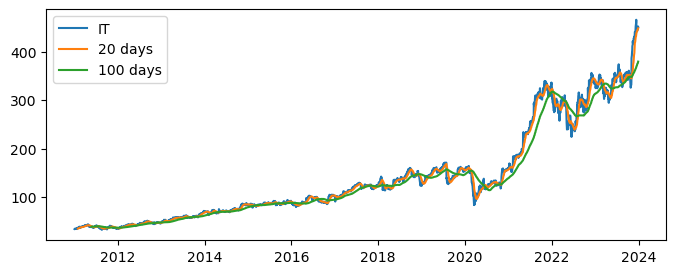

In [16]:
# Calculate the 20 and 100 days moving averages of the closing prices
short_rol = timeSeries.rolling(window=20).mean()
long_rol = timeSeries.rolling(window=100).mean()

plt.figure(figsize=(8,3))
plt.plot(timeSeries.index, timeSeries, label=oneTicker)
plt.plot(short_rol.index, short_rol, label='20 days')
plt.plot(long_rol.index, long_rol, label='100 days')
plt.legend(loc='best')
plt.show()

### Comparing the different stocks

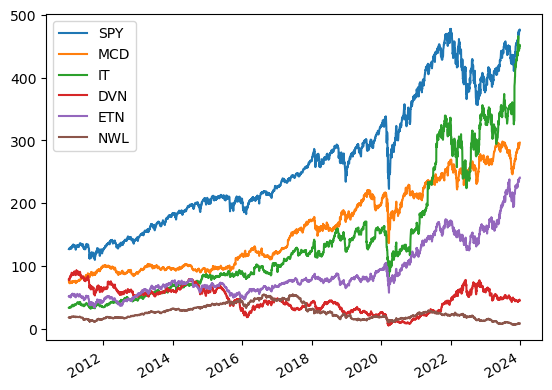

In [17]:
df.plot();

It is not easy to compare the different stocks, as their values may not be of the same order. It is usual to work on the returns insted.

$$
R_{t} := \frac{S_t - S_{t-1}}{S_{t-1}} = \frac{S_t}{S_{t-1}} -1.
$$

In [18]:
returns = df.pct_change(1)
returns.head()

,SPY,MCD,IT,DVN,ETN,NWL
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,-0.000551,-0.029896,-0.005667,-0.006101,-0.004341,-0.008762
2011-01-05,0.005198,0.004710,0.014097,0.006394,0.007072,0.008840
2011-01-06,-0.001959,-0.006027,0.002958,-0.005972,-0.013083,0.002191
2011-01-07,-0.001962,0.002156,0.002949,0.002940,0.000097,-0.012568


In [19]:
log_returns = np.log(df).diff()
log_returns.tail()

,SPY,MCD,IT,DVN,ETN,NWL
2023-12-22,0.002008,0.001063,0.007080,-0.000873,0.005673,-0.015073
2023-12-26,0.004214,0.003969,-0.000045,0.018385,0.006557,0.016223
2023-12-27,0.001806,0.005754,0.000358,-0.005588,0.002536,0.001149
2023-12-28,0.000378,0.004370,0.012549,-0.013889,-0.000291,0.012550
2023-12-29,-0.002899,0.002262,-0.002568,-0.010103,0.000291,-0.016000


#### Remove the NaN values

In [20]:
returns = returns.dropna()
returns.head()

,SPY,MCD,IT,DVN,ETN,NWL
2011-01-04,-0.000551,-0.029896,-0.005667,-0.006101,-0.004341,-0.008762
2011-01-05,0.005198,0.004710,0.014097,0.006394,0.007072,0.008840
2011-01-06,-0.001959,-0.006027,0.002958,-0.005972,-0.013083,0.002191
2011-01-07,-0.001962,0.002156,0.002949,0.002940,0.000097,-0.012568
2011-01-10,-0.001258,-0.010892,0.013231,-0.002039,0.000780,0.000553


In [21]:
log_returns["SPY"] = log_returns["SPY"].dropna()
log_returns["SPY"].head()

2011-01-03         NaN
2011-01-04   -0.000551
2011-01-05    0.005184
2011-01-06   -0.001961
2011-01-07   -0.001964
Name: SPY, dtype: float64

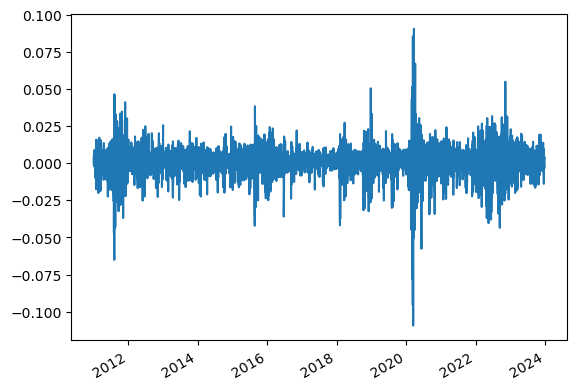

In [22]:
returns["SPY"].plot()
#plt.savefig("LogReturns_spx.png")
plt.show()

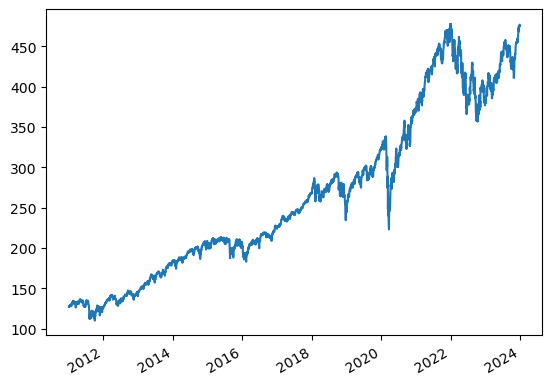

In [23]:
df["SPY"].plot();

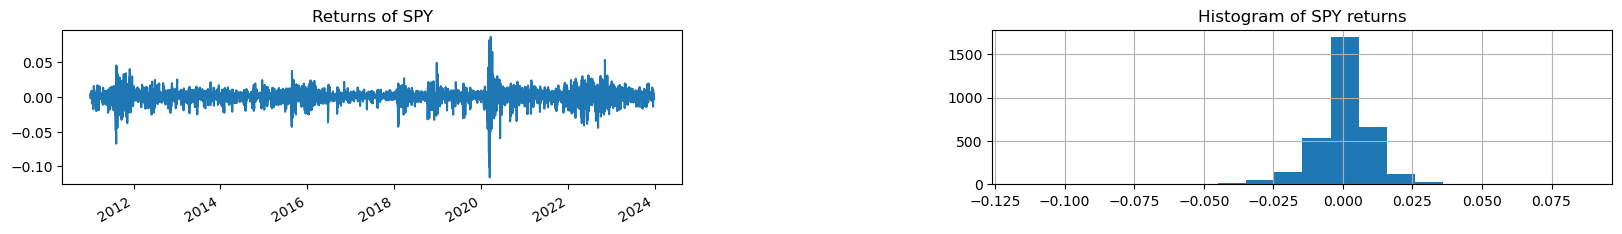

In [24]:
nb = len(listExtractTickers)
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 25))
for i in range(1):
    ticker = listExtractTickers[i]
    plt.subplot(nb, 2, 2*i+1)
    log_returns[ticker].plot()
    plt.title('Returns of %s' %ticker)
    plt.subplot(nb, 2, 2*i+2)
    log_returns[ticker].hist(bins=20)
    plt.title('Histogram of %s returns' %ticker)
plt.subplots_adjust(hspace=1., wspace=0.5)
#plt.savefig("LogReturns_spx.png")
plt.show()


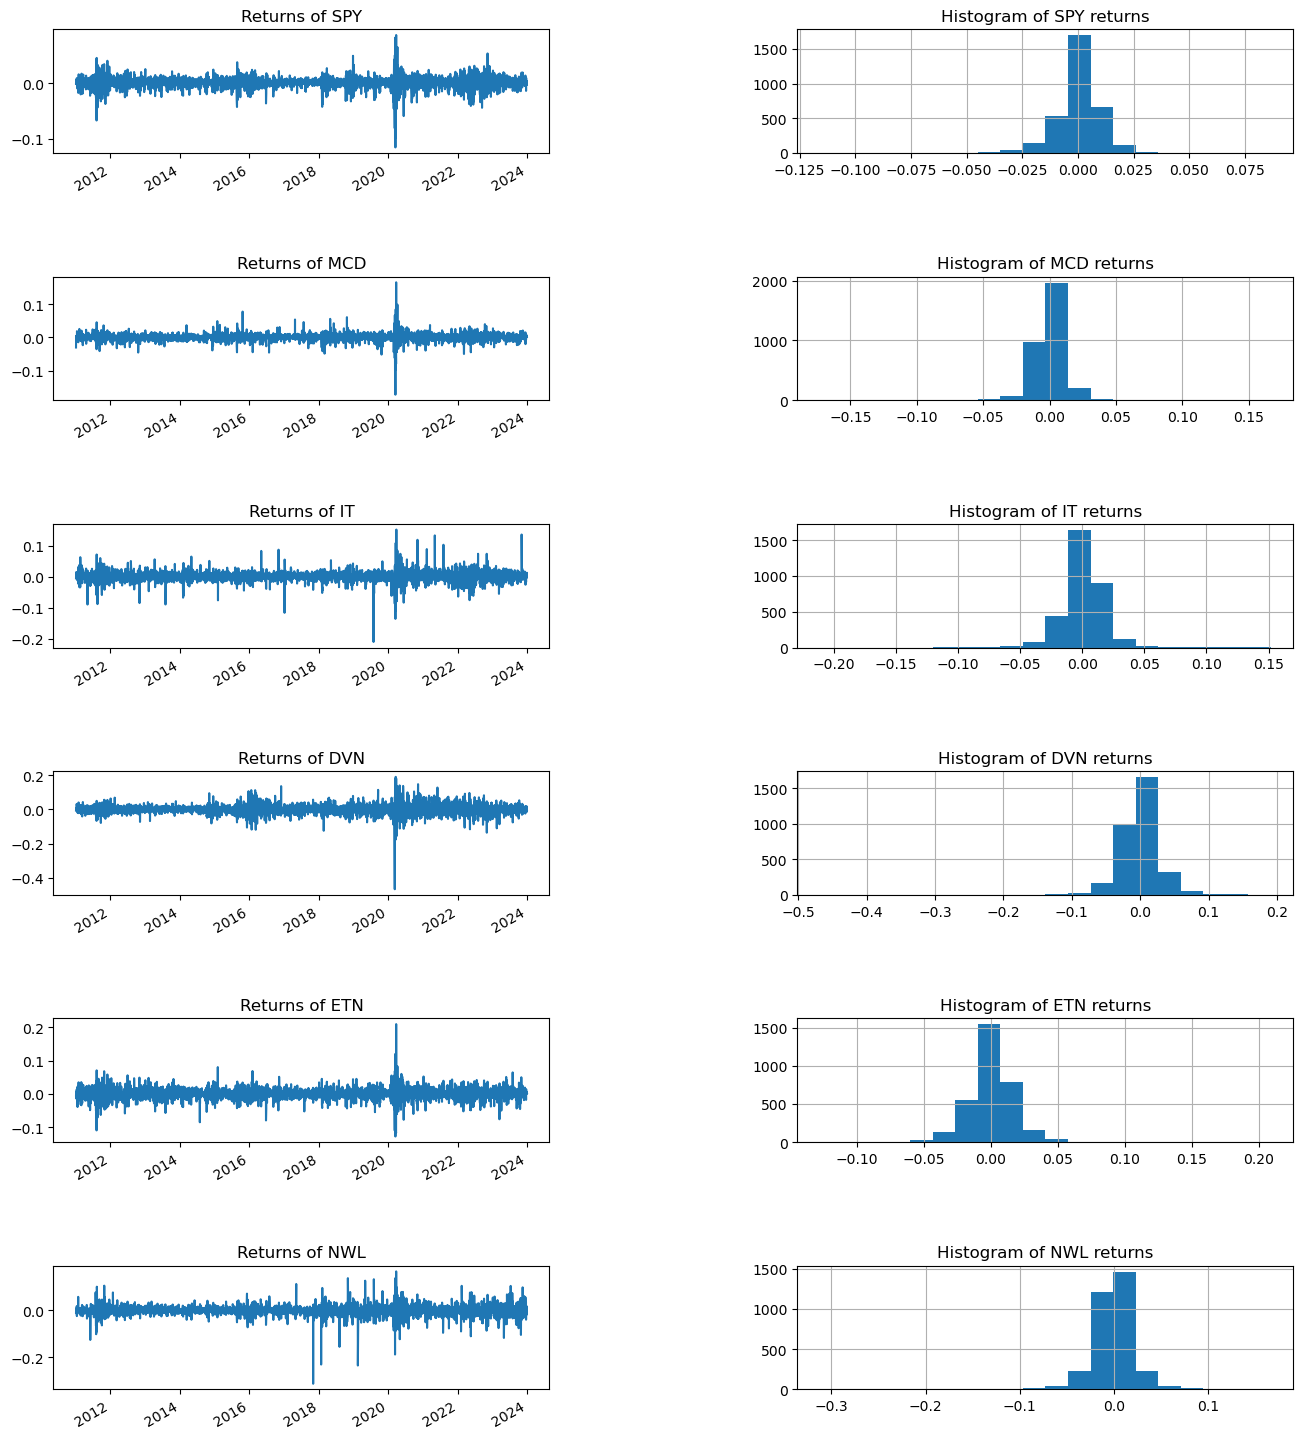

In [25]:
nb = len(listExtractTickers)
fig, axs = plt.subplots(nrows=nb, ncols=2, figsize=(16, 20))
for i in range(nb):
    ticker = listExtractTickers[i]
    plt.subplot(nb, 2, 2*i+1)
    log_returns[ticker].plot()
    plt.title('Returns of %s' %ticker)
    plt.subplot(nb, 2, 2*i+2)
    log_returns[ticker].hist(bins=20)
    plt.title('Histogram of %s returns' %ticker)
plt.subplots_adjust(hspace=1., wspace=0.5)
plt.show()

So far we have looked at stocks and the S&P 500. Today: we are interested in a more general **overview on financial markets** and **financial derivatives**.

# 2. Introduction to financial derivatives
*What exactly are we trying to describe on financial markets?*

*What are we talking about when we talk about derivatives, pricing, hedging, arbitrage?*

In the last 40 years, derivatives have become increasingly important in finance. 

Derivatives products include futures, forward contracts, swaps, options,...
These products are actively traded on many exchanges throughout the world. Other types of transactions are entered in so-called over-the-counter markets. 

A derivative involves two parties agreeing on a future transaction. The future transaction involves an underlying asset or security. 

A first relatively simple type of derivative is a *future or forward contract*. Such a contract is simply an agreement to buy or sell an asset at a certain time in the future for a certain price. For example, a forward contract might specify that party A will buy 10 units of Apple stock from party B on 24th of June 2024. A futures contract is identical with a forward contract, except that is standardized and traded on an exchange. In contrast, forward contracts are traded over-the-counter. 


We will now discuss these concepts in more detail.


## 2.1 Underlying securities

Let us look at different types of underlyings for derivatives.

### Single stocks

The basis of financial markets is the limited liability company (Ltd), whereby companies are owned by their shareholders; 
the shares provide partial ownership and have a value reflecting the company's value.
The shares are quoted and traded on stock exchanges. Above we loaded such data in python and examined it. Later on we will mostly focus on options on stocks. Most concepts that we'll learn carry over to options on other classes of underlyings and other types of derivative contracts. 

- https://finance.yahoo.com/quote/KO/
- https://finance.yahoo.com/quote/TCEHY?p=TCEHY&.tsrc=fin-srch
- https://companiesmarketcap.com/kweichow-moutai/marketcap/
- https://finance.yahoo.com/quote/3988.HK?p=3988.HK&.tsrc=fin-srch

### Indices

Options and futures on indices are traded on several exchanges. Examples of underlying indices: 

- https://uk.finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC
- https://uk.finance.yahoo.com/quote/%5EFTSE?p=%5EFTSE
- https://uk.finance.yahoo.com/quote/%5EN225?p=%5EN225
- https://uk.finance.yahoo.com/quote/000001.SS?p=000001.SS
- https://uk.finance.yahoo.com/quote/%5EHSI?p=%5EHSI
- https://www.verisk.com/insurance/products/property-claim-services/pcs-catastrophe-loss-index/

### Commodities

Futures contracts are traded with a wide range of commodities as underlyings. Commodities include pork bellies, live cattle, suger, wool, aluminum, gold.
As an example, here is a futures contract on Gold:

- https://finance.yahoo.com/quote/GC=F/


### Interest rates

Interest rates are set by national, state and local governments to finance their economic activities. 

Different types of derivatives with interest rates as underlyings are traded, in particular futures and swaps.

Example:

- https://finance.yahoo.com/quote/%5ETNX/

### Exchange rates

Options, forwards, swaps and futures are traded also on foreign exchange rates. Entering into such a transaction may be used to ensure fixed vs floating exchange rates. 

- https://uk.finance.yahoo.com/quote/GBPEUR%3DX?p=GBPEUR%3DX
- https://uk.finance.yahoo.com/quote/GBPUSD%3DX?p=GBPUSD%3DX
- https://uk.finance.yahoo.com/quote/GBPCNY%3DX?p=GBPCNY%3DX

### Cryptocurrencies

Also on cryptocurrencies several types of options and other derivatives are traded. Typically, however, not on classical exchanges. 

- https://uk.finance.yahoo.com/quote/BTC-GBP?p=BTC-GBP
- https://uk.finance.yahoo.com/quote/ETH-GBP?p=ETH-GBP


## 2.2 Derivative securities / Contingent claims

**Definition:
A derivative security (or contingent claim) is a financial contract whose value at expiry $T$ is fully determined by the price of the underlying before and up to time $T$.**

According to the Bank for International Settlements, in the first half of 2019, 
the total notional outstanding for contracts in the derivatives market was around USD$640$ trillion. 

We say that an investor is **long** (**short**) in a position on an asset if she **bought** (**sold**) the asset. *A long investor therefore benefits from the asset price increasing while the short investor benefits when the asset price drops.


### Forward contracts

**Definition: A forward contract is an agreement to buy or sell an asset $S$ at some future time T for a given price K.**

K is called the strike price and T is called the settlement date or maturity.

A trader is said to be long the forward if she agrees to buy the underlying and short if she agrees to sell it.

- https://www.sec.gov/Archives/edgar/data/75488/000095015720000709/ex10-3.htm
- https://aib.ie/content/dam/aib/fxcentre/docs/key-info-doc-fx-fc-roi.pdf


### Options

- A European Call option gives its owner the right (but not the obligation) to buy an underlying $S$ at maturity $T$ for a given price (strike) $K$. Its payoff at $T$ is
$$
\text{European Call Payoff}: \max(S_T - K, 0) =: (S_T - K)_+.
$$

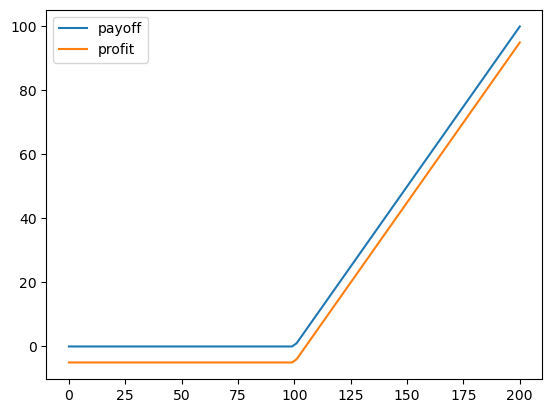

In [26]:
## Payoff and profit of a European call option (holder, i.e., long position)
 
K = 100.
ST = np.linspace(0,200.,100)
payoff = np.maximum(ST-K,0.)
premium = 5.
profit = payoff-premium
plt.plot(ST,payoff,label='payoff')
plt.plot(ST,profit,label='profit')
plt.legend();

- A European Put option gives its owner the right (but not the obligation) to sell an underlying $S$ at maturity $T$ for a given price (strike) $K$. Its payoff at $T$ is
$$
\text{European Put Payoff}: \max(K-S_T, 0) =: (K-S_T)_+.
$$


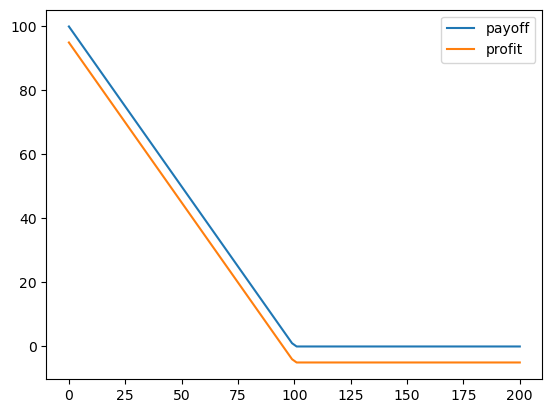

In [27]:
## Payoff and profit of a European put option (holder, i.e., long position)

K = 100.
ST = np.linspace(0,200.,100)
payoff = np.maximum(K-ST,0.)
premium = 5.
profit = payoff-premium
plt.plot(ST,payoff,label='payoff')
plt.plot(ST,profit,label='profit')
plt.legend();

New options created on the basis of put and call options:

For example, a straddle has payoff 

$$(S_T-K)_+ + (K-S_T)_+$$

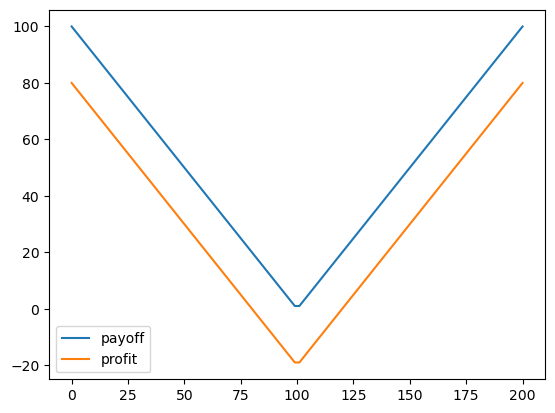

In [28]:
## Payoff and profit of a European straddle option (holder, i.e., long position)

K = 100.
ST = np.linspace(0,200.,100)
payoff = np.maximum(K-ST,0.)+np.maximum(ST-K,0.)
premium = 20.
profit = payoff-premium
plt.plot(ST,payoff,label='payoff')
plt.plot(ST,profit,label='profit')
plt.legend();

Payoff / profit of a short straddle position (i.e. selling a straddle)

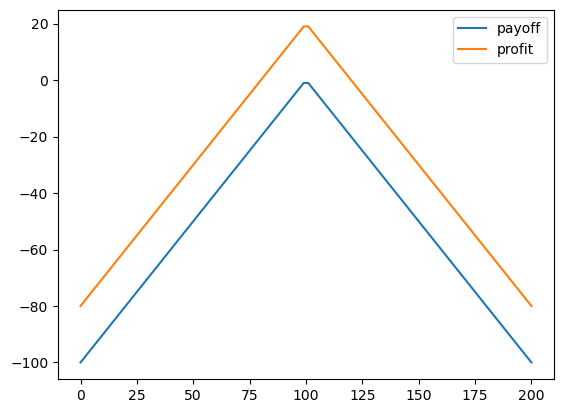

In [29]:
## Payoff and profit of a European straddle option (seller, i.e., short position)

K = 100.
ST = np.linspace(0,200.,100)
payoff = -np.maximum(K-ST,0.)-np.maximum(ST-K,0.)
premium = 20.
profit = payoff+premium
plt.plot(ST,payoff,label='payoff')
plt.plot(ST,profit,label='profit')
plt.legend();

- An American Call (respectively Put) option gives its owner the right (but not the obligation) to buy (respectively sell) an underlying $S$ **at any time before or at maturity** $T$ for a given price (strike) $K$.



- An Asian option has payoff
\begin{align*}
\text{Asian Call Payoff}: \qquad & \qquad (A_T - K)_+,\\
\text{Asian Put Payoff}:  \qquad & \qquad (K - A_T)_+,
\end{align*}
where 
$$
A_T := \frac{1}{T}\int_{0}^{T}S_u\mathrm{d}u.
$$

Example: https://www.cboe.com/delayed_quotes/spy/quote_table

Barrier options: payoff depends on whether the underlying asset's price reaches a certain level before maturity. 

Most barrier options are either *knock-in* (option only pays off if the barrier is reached) or *knock-out* options (option can not be exercised anymore if the barrier is reached). 

Example: An up-and-out call with barrier B has payoff

$$
\text{Up-and-out Call Payoff}:  (S_T-K)_+ {\bf 1}_{\{\max_{0\leq t\leq T}S_t <B\}}.
$$


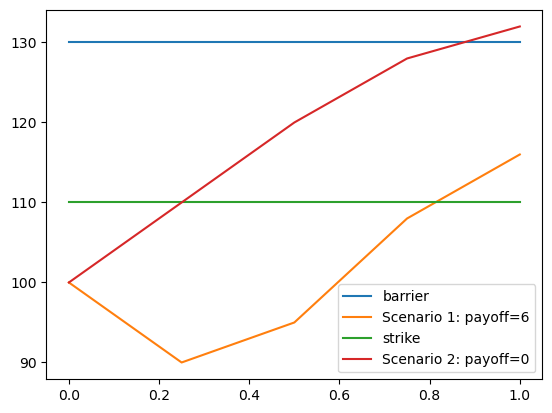

In [30]:
## Example for payoff of an up-and-out call option.

t = np.linspace(0,1.,5)
ST1 = np.array([100.,90.,95.,108.,116.])
ST2 = np.array([100.,110.,120.,128.,132.])
barrier = 130.*np.ones(5)
K = 110.*np.ones(5)
profit = payoff-premium
plt.plot(t,barrier,label='barrier')
plt.plot(t,ST1,label='Scenario 1: payoff=6')
plt.plot(t,K,label='strike')
plt.plot(t,ST2,label='Scenario 2: payoff=0')
plt.legend();

Many other types of options: basket options (price depends on several underlyings, forward starting, cliquet, ...)

### Swaps

**Definition: A swap is an agreement to exchange two quantities at some future date.**

- https://www.sec.gov/Archives/edgar/data/1508478/000119312511077213/dex1015.htm
- https://www.dbs.com.hk/iwov-resources/pdf/appforms/investments/Fixed-Rate-Ccy-Linked-SIP-TS-Eng-201602.pdf
- https://www.sec.gov/Archives/edgar/data/70858/000119312512021960/d288901d424b2.htm

## 2.3 Markets

- Organised exchanges (https://www.cboe.com/) give more guarantees in terms of liquidity, standardisation, transparency

- Over-The-Counter (OTC), directly between two parties.

Next time:

**--> Hedging and pricing by replication<--**

The rest of today: 

- Examining various types of options data
- Payoff structures of options


## 2.4 Example: options on SPY

The goal of this example is to use python to load and examine some European options on S\&P500.
The options data was downloaded using the `python` package `yahoo_fin`.

In [31]:
from yahoo_fin import options

In [32]:
ticker = "^SPX"
initialSpot = yf.get_live_price(ticker)
print("Current value of", ticker, ":", initialSpot)

Current value of ^SPX : 5156.22021484375


In [33]:
maturities = options.get_expiration_dates(ticker)
print(maturities)
T = maturities[-1]
calls = options.get_calls(ticker, T)
calls.head()

['March 18, 2024', 'March 19, 2024', 'March 20, 2024', 'March 21, 2024', 'March 22, 2024', 'March 25, 2024', 'March 26, 2024', 'March 27, 2024', 'March 28, 2024', 'April 1, 2024', 'April 2, 2024', 'April 3, 2024', 'April 4, 2024', 'April 5, 2024', 'April 8, 2024', 'April 9, 2024', 'April 10, 2024', 'April 11, 2024', 'April 12, 2024', 'April 15, 2024', 'April 16, 2024', 'April 17, 2024', 'April 18, 2024', 'April 19, 2024', 'April 22, 2024', 'April 23, 2024', 'April 26, 2024', 'April 30, 2024', 'May 3, 2024', 'May 17, 2024', 'May 31, 2024', 'June 21, 2024', 'June 28, 2024', 'July 19, 2024', 'July 31, 2024', 'August 16, 2024', 'August 30, 2024', 'September 20, 2024', 'September 30, 2024', 'October 18, 2024', 'November 15, 2024', 'December 20, 2024', 'December 31, 2024', 'January 17, 2025', 'February 21, 2025', 'March 21, 2025', 'April 17, 2025', 'June 20, 2025', 'December 19, 2025', 'March 20, 2026', 'December 18, 2026', 'December 17, 2027', 'December 15, 2028', 'December 21, 2029']


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,SPX291221C01800000,2024-01-08 4:29PM EDT,1800.0,3102.40,3292.2,3372.2,0.0,-,1,0,22.37%
1,SPX291221C02000000,2024-03-08 10:44AM EDT,2000.0,3400.60,3331.6,3411.6,0.0,-,1,1,40.54%
2,SPX291221C03000000,2024-02-26 3:23PM EDT,3000.0,2566.43,2627.8,2707.8,0.0,-,-,451,37.01%
3,SPX291221C04000000,2024-03-13 3:15PM EDT,4000.0,2004.80,1982.5,2062.5,0.0,-,6,3322,33.14%
4,SPX291221C04400000,2024-02-12 11:47AM EDT,4400.0,1652.19,1727.8,1807.8,0.0,-,-,10,31.28%


In [34]:
ticker = "SPY"
initialSpot = yf.get_live_price(ticker)
print("Current value of", ticker, ":", initialSpot)
maturities = options.get_expiration_dates(ticker)
print(maturities)
T = maturities[-1]
calls = options.get_calls(ticker, T)
calls.head()

Current value of SPY : 514.0499877929688
['March 18, 2024', 'March 19, 2024', 'March 20, 2024', 'March 21, 2024', 'March 22, 2024', 'March 25, 2024', 'March 26, 2024', 'March 27, 2024', 'March 28, 2024', 'April 5, 2024', 'April 12, 2024', 'April 19, 2024', 'April 26, 2024', 'April 30, 2024', 'May 17, 2024', 'May 31, 2024', 'June 21, 2024', 'June 28, 2024', 'July 19, 2024', 'July 31, 2024', 'August 16, 2024', 'August 30, 2024', 'September 20, 2024', 'September 30, 2024', 'December 20, 2024', 'December 31, 2024', 'January 17, 2025', 'March 21, 2025', 'June 20, 2025', 'December 19, 2025', 'January 16, 2026', 'December 18, 2026']


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,SPY261218C00200000,2024-03-18 12:13PM EDT,200.0,325.25,324.68,329.0,-3.75,-1.14%,3,79,48.89%
1,SPY261218C00220000,2024-01-29 1:30PM EDT,220.0,279.31,296.82,300.5,0.00,-,1,1,35.43%
2,SPY261218C00230000,2024-03-06 2:49PM EDT,230.0,294.50,298.00,303.0,0.00,-,1,9,46.04%
3,SPY261218C00240000,2024-01-10 4:01PM EDT,240.0,255.00,274.50,279.5,0.00,-,1,4,30.96%
4,SPY261218C00250000,2024-03-14 2:02PM EDT,250.0,281.02,281.00,286.0,0.00,-,2,23,44.33%


In [35]:
### If there is an issue with the yahoo_finance package we can also directly load the data. 
#calls.to_csv('spy_options.csv')

#calls = pd.read_csv('spy_options.csv',index_col=0)

In [36]:
initialSpot

514.0499877929688

In [37]:
calls = calls[['Strike', 'Bid', 'Ask','Volume']]
calls['MidPrice'] = .5*(calls['Bid']+calls['Ask'])
calls.head()

,Strike,Bid,Ask,Volume,MidPrice
0,200.0,324.68,329.0,3,326.84
1,220.0,296.82,300.5,1,298.66
2,230.0,298.00,303.0,1,300.50
3,240.0,274.50,279.5,1,277.00
4,250.0,281.00,286.0,2,283.50


In [38]:
calls = calls[calls["MidPrice"]!=0.]

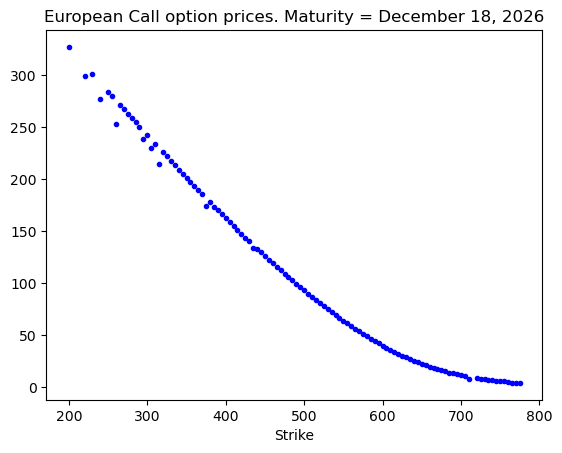

In [39]:
plt.plot(calls["Strike"], calls["MidPrice"], 'b.')
plt.title("European Call option prices. Maturity = %s" %T)
plt.xlabel("Strike")
plt.show()

Clearly, as the strike increases the option price decreases: the price of the right to buy SPY (the ETF tracking the S&P500) in the future at price $K$ is smaller for larger $K$.

Plotting in terms of log-moneyness $\log(K/S_0)$ rather than in terms of strikes.

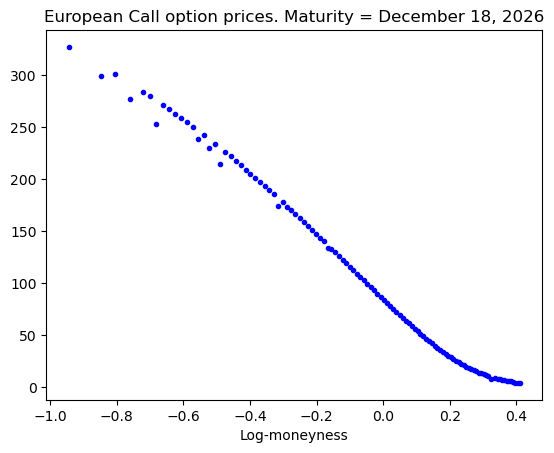

In [40]:
plt.plot(np.log(calls["Strike"] / initialSpot), calls["MidPrice"], 'b.')
plt.title("European Call option prices. Maturity = %s" %T)
plt.xlabel("Log-moneyness")
plt.show()

## 2.5 No-arbitrage bounds for options

Let us now start with some first theoretical consideration on prices of options. These considerations are not bound to any model. They are only based on the concept of **arbitrage**. 

*What is an arbitrage opportunity?*

An arbitrage opportunity is a series of simultaneous transactions in one or several markets that allows to make a riskless profit. This can be illustrated in the following simple example: 

Suppose a stock is traded both on the New York Stock Exchange
(www.nyse.com) and the London Stock Exchange (www.stockex.co.uk). 

The stock price is 128 USD on the NYSE and £100 in London. The USD-GBP exchange rate is 1.3 USD per pound. When there are no transaction costs, one could simply make a profit by buying the 100 shares of the stock on the NYSE and selling them in London. This would yield a risk-free profit of $100\cdot1.3-128 =2$ USD per share, i.e., $200 overall. 



This concept carries over to the pricing of options and leads to some natural relations between prices of options.

1. *Upper bound on call option prices:* a European call option gives the holder the right to buy one share of the underlying for the price $K$ at maturity $T$. The call option can never be worth more than the underlying. In particular, the price of the option today will always be lower than the current price of the underlying.

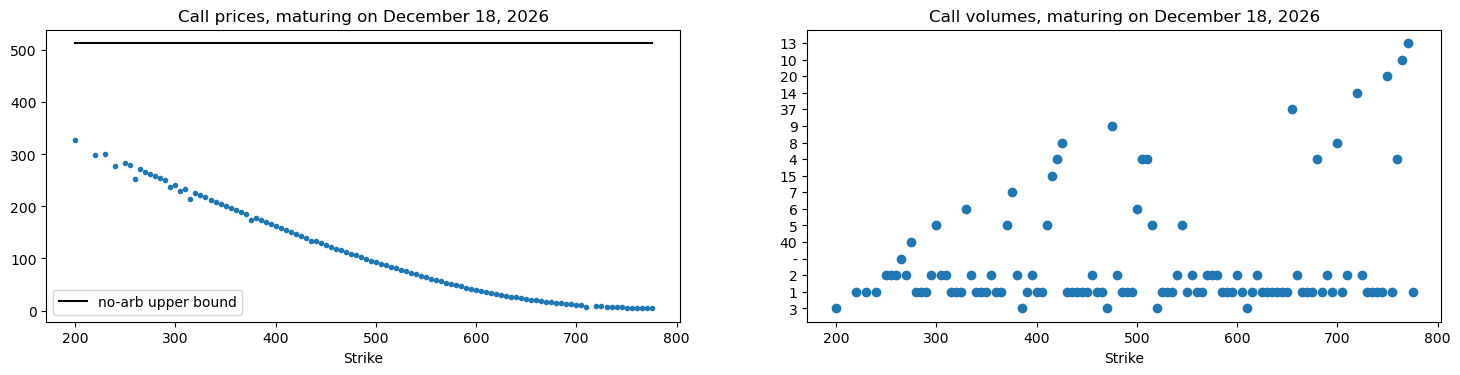

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))
ax1.plot(calls['Strike'], calls['MidPrice'], '.')
ax1.set_title("Call prices, maturing on %s" %T)
ax1.plot(calls['Strike'], [initialSpot for K in calls['Strike']], 'k', label="no-arb upper bound")
ax1.set_xlabel('Strike')
ax1.legend(loc="best")

ax2.plot(calls['Strike'], calls['Volume'], 'o')
ax2.set_title("Call volumes, maturing on %s" %T)
ax2.set_xlabel('Strike')
plt.subplots_adjust(bottom=0.15, wspace=0.2)
plt.show()

2. *Lower bound for prices of (European) call options*: Assuming the underlying does not pay any dividends and the interest rate is $0$, in an arbitrage-free market the price of a European call option with strike $K$ will always be at least $S_0 - K$. Otherwise we could make a risk-less profit by proceeding as follows: 

- Today: we buy the call option at price $p<S_0-K$, put aside $K$ in the bank account and short-sell the stock today. 
- At maturity: we exercise the call option, buy the stock at price $K$ (with the money we put aside in the bank) and return the stock.

This would leave us with a profit of $S_0-K-p>0$.

As we see market prices are in line with those bounds:

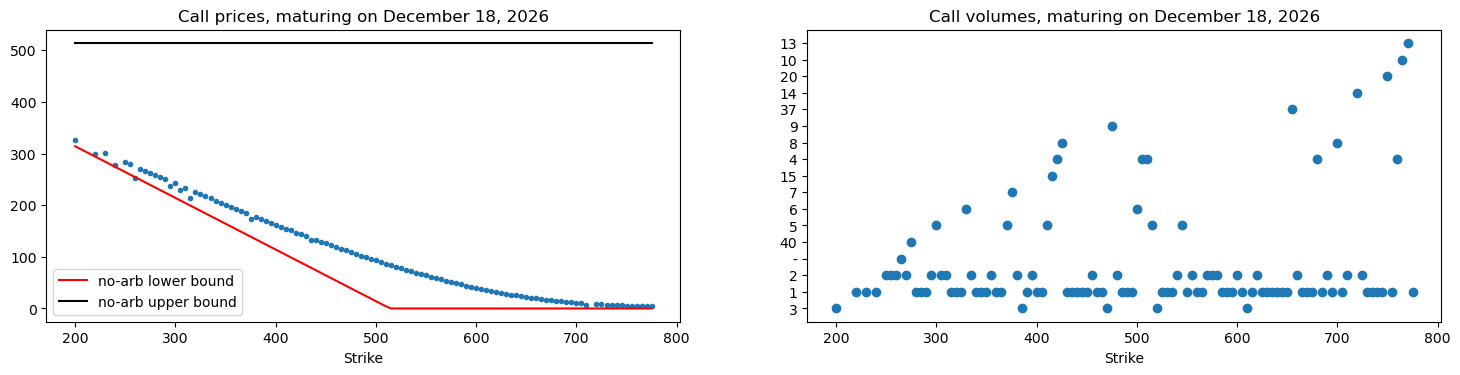

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))
ax1.plot(calls['Strike'], calls['MidPrice'], '.')
ax1.set_title("Call prices, maturing on %s" %T)
#ax1.plot(calls['Strike'], [s0 for K in calls['Strike']], 'k', label="no-arb upper bound")
ax1.plot(calls['Strike'], [np.maximum(initialSpot - K, 0.) for K in calls['Strike']], 'r', label="no-arb lower bound")
ax1.plot(calls['Strike'], [initialSpot for K in calls['Strike']], 'k', label="no-arb upper bound")
ax1.set_xlabel('Strike')
ax1.legend(loc="best")

ax2.plot(calls['Strike'], calls['Volume'], 'o')
ax2.set_title("Call volumes, maturing on %s" %T)
ax2.set_xlabel('Strike')
plt.subplots_adjust(bottom=0.15, wspace=0.2)
plt.show()

Similar bounds hold for other types of options, e.g., European put options. 

Arbitrage opportunities could also arise from different types of options with the same underlying. In particular, this induces the so-called put-call parity. When interest rates are $0$, this relation between the price $c$ of a call option $c$ and the price $p$ of a put option with the same strike $K$ is as follows:

$$ c+ K = p + S_0 $$

It follows from similar no-arbitrage arguments as the lower bound derived for call option prices above.

In [45]:
puts = options.get_puts(ticker, T)

puts = puts[['Strike', 'Bid', 'Ask','Volume']]
puts['MidPrice'] = .5*(puts['Bid']+puts['Ask'])
puts.head()


,Strike,Bid,Ask,Volume,MidPrice
0,200.0,1.95,2.25,3,2.100
1,210.0,2.03,2.51,10,2.270
2,220.0,2.23,2.79,10,2.510
3,230.0,2.52,3.11,2,2.815
4,240.0,2.83,3.47,2,3.150


In [46]:
puts = puts[puts["MidPrice"]!=0.]

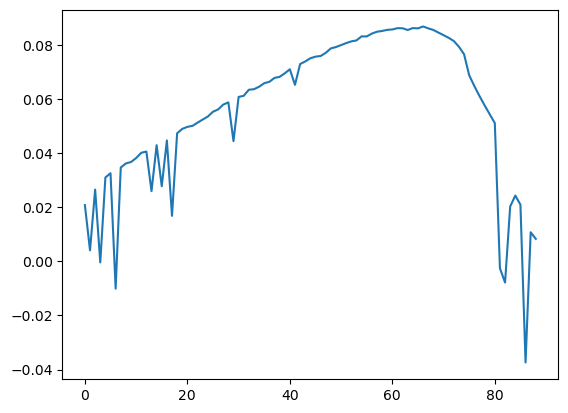

In [47]:
put_call_parity = []
strike_list = []
for i in range(len(puts['Strike'])):
    same_strike = (calls['Strike'] == puts['Strike'].iloc[i])
    if np.sum(same_strike)>0:
        c= calls[same_strike]['MidPrice']
        p = puts['MidPrice'].iloc[i]
        K = puts['Strike'].loc[i]
        strike_list.append(K)
        put_call_parity.append((c+K-p-initialSpot)/initialSpot)

plt.plot(np.array(put_call_parity))

In [52]:
## What about different maturity?

T = maturities[-2]
calls = options.get_calls(ticker, T)
puts = options.get_puts(ticker,T)
puts['MidPrice'] = .5*(puts['Bid']+puts['Ask'])
calls['MidPrice'] = .5*(calls['Bid']+calls['Ask'])
calls = calls[calls["MidPrice"]!=0.]
puts = puts[puts["MidPrice"]!=0.]

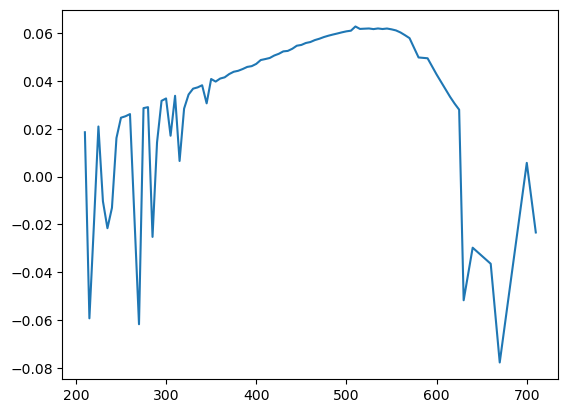

In [53]:
put_call_parity = []
strike_list = []
for i in range(len(puts['Strike'])):
    same_strike = (calls['Strike'] == puts['Strike'].iloc[i])
    if np.sum(same_strike)>0:
        c= calls[same_strike]['MidPrice']
        p = puts['MidPrice'].iloc[i]
        K = puts['Strike'].loc[i]
        strike_list.append(K)
        put_call_parity.append((c+K-p-initialSpot)/initialSpot)

plt.plot(np.array(strike_list),np.array(put_call_parity))

So far: we just looked at bounds on option prices. In the next sessions we will look in more detail at option pricing based on no-arbitrage considerations.

## 2.6 Example: options on Bitcoin

*What is Bitcoin?*

Satoshi Nakamoto's White Paper

- Cryptocurrencies and the associated blockchain technology are still around
- The subject combines finance, economics, data science, computer science

Jamie Dimon (12/9/2017): "A fraud, worse than tulip bulbs".
Warren Buffet (5/5/2018): "Probably rat poison squared".

Bitcoin is not an actual coin, but a unit of exchange. Example: https://www.coindesk.com/price/bitcoin/

The smallest unit to trade bitcoin is one satoshi, which is worth 0.00000001 BTC.

How to transact in Bitcoin:
- Third-party software (coinbase, ...), which provides a wallet and access to a platform exchange
- You can also separately choose a wallet and an exchange
- When you buy with cash, you receive a copy of your private key

With bitcoin, you can
- trade other cryptocurrencies
- transfer back to "classical" currencies (if allowed)
- purchase goods (whenever possible)

Note that
- it is not a stock / share (i.e. you do not own any right)
- it is not a treasury bill

Issues with standard credit cards: expensive
Bitcoin is decentralised and small fees

Issue with centralised system:
- potential monopoly of intermediaries and abuse (fees and so on)
- some people do not like the idea (libertarians, anarchists, ...)

Issues with fiat money:
- For example if the currency becomes unstable (Weimar republic, 1922; Venezuala, 2016-...)
- In case of inflation, the currency erodes in value

Bitcoin is designed to protect against these two issues, BUT
- not recognised officially by (almost) any government
- what is its real value?
- Can it be used as a medium of exchange?


Most common derivatives on cryptocurrencies:

- futures
- options
- *perpetual futures*
    
https://www.marketwatch.com/investing/future/btch25

https://www.cmegroup.com/markets/cryptocurrencies/bitcoin/bitcoin.quotes.html#venue=globex

Numerous exchanges for on which cryptocurrency derivatives are traded. For example:

https://metrics.deribit.com/options/BTC


Let us have a look at some options data. The data can be downloaded here:

https://research-repository.uwa.edu.au/en/datasets/deribits-options-data

In [54]:
import pandas as pd
btc = pd.read_csv("C:\\Users\\lukas\\Downloads\\Deribit_w_IV.csv",index_col=0)

In [55]:
btc.head()
btc.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 761067 entries, 1487038496635.0 to 1581326685219.0
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   price            761067 non-null  float64
 1   instrument_name  761067 non-null  object 
 2   index_price      761067 non-null  float64
 3   direction        761067 non-null  object 
 4   amount           761067 non-null  float64
 5   time_trade       761067 non-null  object 
 6   strike           761067 non-null  int64  
 7   type             761067 non-null  object 
 8   time_create      761067 non-null  object 
 9   time_expire      761067 non-null  object 
 10  date             761067 non-null  object 
 11  irate            761067 non-null  float64
 12  price_USD        761067 non-null  float64
 13  iv_Tbill         761067 non-null  object 
 14  tt               761067 non-null  float64
dtypes: float64(6), int64(1), object(8)
memory usage: 92.9+ MB


In [56]:
calls = btc.loc[btc[btc.columns[7]] == "call"]

In [57]:
calls_t = calls.loc[calls[calls.columns[10]] == '2017-02-14']

In [58]:
calls_tt = calls_t.loc[calls_t[calls_t.columns[9]] == '2017-03-31 08:00:00']

In [60]:
calls_tt

,price,instrument_name,index_price,direction,amount,time_trade,strike,type,time_create,time_expire,date,irate,price_USD,iv_Tbill,tt
timestamp,,,,,,,,,,,,,,,
1.487082e+12,0.1212,BTC-31MAR17-1020-C,1010.69,buy,1.0,2017-02-14 14:13:48,1020,call,2016-12-28 14:37:31,2017-03-31 08:00:00,2017-02-14,0.00535,122.495628,89.7879740048806,0.122576
1.487082e+12,0.1400,BTC-31MAR17-1020-C,1010.69,sell,1.0,2017-02-14 14:13:48,1020,call,2016-12-28 14:37:31,2017-03-31 08:00:00,2017-02-14,0.00535,141.496600,103.3883786939,0.122576
1.487082e+12,0.1400,BTC-31MAR17-1020-C,1010.69,sell,1.0,2017-02-14 14:13:49,1020,call,2016-12-28 14:37:31,2017-03-31 08:00:00,2017-02-14,0.00535,141.496600,103.388380143791,0.122576
1.487082e+12,0.1400,BTC-31MAR17-1020-C,1010.69,sell,1.0,2017-02-14 14:13:49,1020,call,2016-12-28 14:37:31,2017-03-31 08:00:00,2017-02-14,0.00535,141.496600,103.388381580261,0.122576
1.487082e+12,0.1400,BTC-31MAR17-1020-C,1010.69,sell,1.0,2017-02-14 14:13:49,1020,call,2016-12-28 14:37:31,2017-03-31 08:00:00,2017-02-14,0.00535,141.496600,103.38838298988,0.122576
1.487082e+12,0.1400,BTC-31MAR17-1020-C,1010.69,sell,1.0,2017-02-14 14:13:49,1020,call,2016-12-28 14:37:31,2017-03-31 08:00:00,2017-02-14,0.00535,141.496600,103.388384412923,0.122576
1.487082e+12,0.1400,BTC-31MAR17-1020-C,1010.69,sell,1.0,2017-02-14 14:13:49,1020,call,2016-12-28 14:37:31,2017-03-31 08:00:00,2017-02-14,0.00535,141.496600,103.388385849394,0.122576
1.487082e+12,0.1400,BTC-31MAR17-1020-C,1010.69,sell,1.0,2017-02-14 14:13:49,1020,call,2016-12-28 14:37:31,2017-03-31 08:00:00,2017-02-14,0.00535,141.496600,103.388387285861,0.122576
1.487082e+12,0.1400,BTC-31MAR17-1020-C,1010.69,sell,1.0,2017-02-14 14:13:49,1020,call,2016-12-28 14:37:31,2017-03-31 08:00:00,2017-02-14,0.00535,141.496600,103.388388735755,0.122576


In [61]:
maturities = pd.to_datetime(calls_tt["time_expire"])-pd.to_datetime(calls_tt['date'])
T= maturities.iloc[1].days

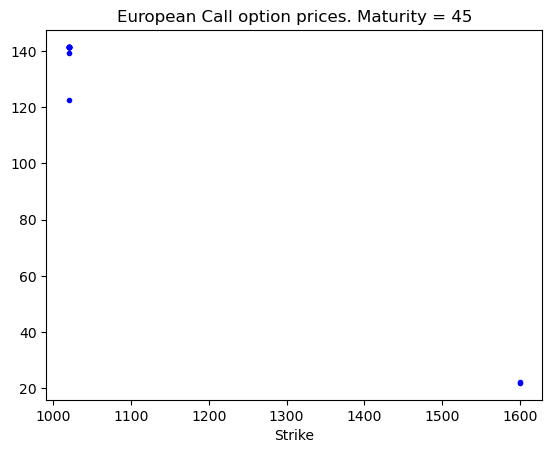

In [62]:
plt.plot(calls_tt["strike"], calls_tt["price_USD"], 'b.')
plt.title("European Call option prices. Maturity = %s" %T)
plt.xlabel("Strike")
plt.show()

Upon closer look: it's all the same contract... Just traded at different times.